### 3W DATASET PROJECT

In [168]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [169]:
print(os.getcwd()) 

C:\Users\Mark\Desktop\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset


In [170]:
# Set the working directory to the dataset folder
os.chdir(r"C:\Users\Mark\Desktop\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset")

# relative path
dataset_path = "dataset"  

#files in the shortened path
print(os.listdir(dataset_path))

['0', '1', '2', '3', '3w_1.ipynb', '4', '5', '6', '7', '8', 'codes']


In [ ]:
# Define dataset path
#cleaned_data = r'C:\Users\Mark\Desktop\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\dataset' 

## DATA PREPROCESSING AND VISUALISING 

In [10]:
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} file(s) in '{dirpath}'.")

In [ ]:
walk_through_dir(cleaned_data)

TypeError: expected str, bytes or os.PathLike object, not dict

In [86]:
import random
from pathlib import Path

# Set seed
# random.seed(42)

# Set dataset directory (convert string to Path object)
dataset_path = Path("dataset")

# 1. Get all data paths 
csv_files = list(dataset_path.glob("*/*.csv"))

#data_path_list

# 2. Pick a random file path
random_file_path = random.choice(csv_files)
#random_file_path

# 3. Get file class(directory) from path name 
data_class = random_file_path.parent.stem
data_class

# 4. Open CSV file
random_csv = pd.read_csv(random_file_path)

# 5. Print metadata
print(f"Random CSV path: {random_file_path}")
print(f"Number of rows: {random_csv.shape[0]}")
print(f"Number of columns: {random_csv.shape[1]}")
print("First 5 rows of the CSV:")
#print(random_csv.head())

print("\nColumn Names:", random_csv.columns.tolist())
random_csv

Random CSV path: dataset\6\SIMULATED_00080.csv
Number of rows: 26999
Number of columns: 11
First 5 rows of the CSV:

Column Names: ['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class', 'instance_label']


,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,instance_label
0,2018-04-02 20:56:33.000000,20977290.0,14423670.0,NaN,1804079.0,83.25629,NaN,NaN,NaN,0,simulated
1,2018-04-02 20:56:34.000000,20977290.0,14423690.0,NaN,1804078.0,83.25629,NaN,NaN,NaN,0,simulated
2,2018-04-02 20:56:35.000000,20977290.0,14423670.0,NaN,1804079.0,83.25628,NaN,NaN,NaN,0,simulated
3,2018-04-02 20:56:36.000000,20977290.0,14423670.0,NaN,1804078.0,83.25628,NaN,NaN,NaN,0,simulated
4,2018-04-02 20:56:37.000000,20977290.0,14423690.0,NaN,1804079.0,83.25627,NaN,NaN,NaN,0,simulated
...,...,...,...,...,...,...,...,...,...,...,...
26994,2018-04-03 04:26:27.000000,23952310.0,17599410.0,NaN,7885948.0,78.37658,NaN,NaN,NaN,6,simulated
26995,2018-04-03 04:26:28.000000,23952310.0,17599410.0,NaN,7885947.0,78.37658,NaN,NaN,NaN,6,simulated
26996,2018-04-03 04:26:29.000000,23952310.0,17599410.0,NaN,7885947.0,78.37657,NaN,NaN,NaN,6,simulated
26997,2018-04-03 04:26:30.000000,23952310.0,17599410.0,NaN,7885947.0,78.37656,NaN,NaN,NaN,6,simulated


In [120]:
import random
from pathlib import Path

def get_random_directory(dataset_path):
    """
    Selects a random directory from the given dataset path.
    
    Parameters:
    - dataset_path: Path to the dataset containing multiple directories
    
    Returns:
    - A random directory name (string) or None if no directories are found
    """
    dataset_path = Path(dataset_path)  # Convert to Path object
    directories = [folder.stem for folder in dataset_path.iterdir() if folder.is_dir()]  # Get all directory names

    if not directories:
        print("No directories found!")
        return None  # Return None if no directories exist

    random_directory = random.choice(directories)  # Pick a random directory
    return random_directory

# Example usage
dataset_path = "dataset"  # Adjust path if needed
random_dir = get_random_directory(dataset_path)

if random_dir:
    print(f"Randomly selected directory: {random_dir}")


Randomly selected directory: 4


In [139]:
directory_name = random_csv.parent.stem
directory_name

'5'

Selected file: dataset\4\WELL-00010_20180424200133.csv


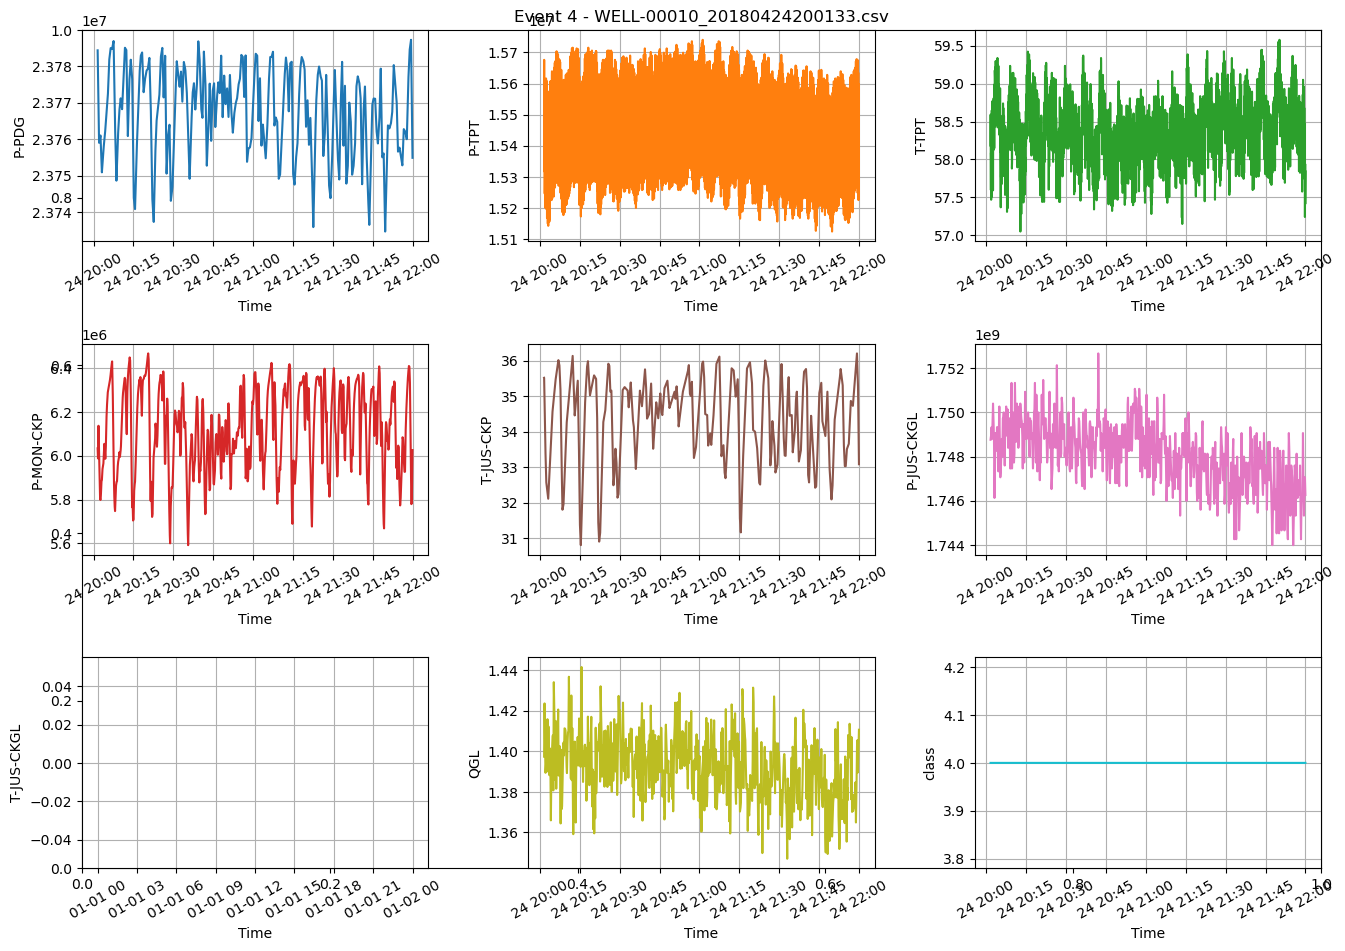

In [166]:

def plot_columns_over_time(dataset_path, nrows=3, ncols=3):
    """
    Selects a random CSV file, reads its data, and plots multiple columns against the timestamp in a grid layout.
    Each column is plotted in a different color.

    - dataset_path: Path to the dataset directory containing subfolders.
    - nrows, ncols: Layout for subplots.
    """
    #random.seed(42)
    # Select a random CSV file
    random_csv = random.choice(csv_files)
    print(f"Selected file: {random_csv}")

    # Read the CSV file
    df = pd.read_csv(random_csv)

    # Identify timestamp column
    timestamp = df.columns[0]

    # Convert timestamp to datetime
    df[timestamp] = pd.to_datetime(df[timestamp], errors='coerce')

    # Drop invalid timestamps and sort
    df = df.dropna(subset=[timestamp]).sort_values(by=timestamp)

    # Select numeric columns (excluding timestamp)
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if timestamp in numeric_cols:
        numeric_cols.remove(timestamp)  # Remove timestamp from numeric columns

    # Limit to available columns if less than required
    num_plots = min(len(numeric_cols), nrows * ncols)

    # Generate unique colors for each plot
    colors = plt.cm.tab10(np.linspace(0, 1, num_plots))  

    plt.figure(figsize=(14, 10))
    plt.title(f"Event {random_csv.parent.stem} - {random_csv.name}", fontsize=12, color="black")
    # plt.ylim(top=50)

    for i, (col, color) in enumerate(zip(numeric_cols[:num_plots], colors)):  
        plt.subplot(nrows, ncols, i + 1)
        # plt.subplots_adjust(top=0.85)
        plt.plot(df[timestamp], df[col], label=col, color=color)

        #plt.title(col, fontsize=10, color="black")
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.xticks(rotation=30)
        plt.grid()
    
    plt.tight_layout()
    plt.show()

# Run function
plot_columns_over_time("dataset")  


In [ ]:


# def plot_random_csv_per_folder(dataset_path):
#     """
#     - Selects a random CSV file from each pipeline folder in 'dataset'
#     - Plots all numeric columns as subplots in a single figure
#     - Uses timestamp as x-axis
#     """
#     dataset_path = Path(dataset_path)  # Convert to Path object

#     # Loop through each pipeline folder
#     for subfolder in dataset_path.iterdir():
#         if subfolder.is_dir():  # Ensure it's a folder
#             csv_files = list(subfolder.glob("*.csv"))  # Get all CSV files

#             if not csv_files:
#                 print(f"No CSV files in {subfolder}")
#                 continue  # Skip if no CSVs found

#             # Select a random CSV file from the folder
#             random_csv_file = random.choice(csv_files)
#             print(f"\nSelected file from {subfolder.stem}: {random_csv_file}")

#             # Read the CSV file
#             df = pd.read_csv(random_csv_file)

#             # Identify timestamp column
#             tinestamp = None
#             for col in df.columns:
#                 if "time" in col.lower() or "timestamp" in col.lower():
#                     tinestamp = col
#                     break

#             if not tinestamp:
#                 print(f"No timestamp column found in {random_csv_file}")
#                 continue  # Skip if no timestamp column

#             # Convert timestamp column to datetime
#             df[tinestamp] = pd.to_datetime(df[tinestamp], errors='coerce')
#             df = df.dropna(subset=[tinestamp]).sort_values(by=tinestamp)

#             # Select numeric columns (excluding timestamp)
#             numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

#             if tinestamp in numeric_cols:
#                 numeric_cols.remove(timestamp)  # Remove timestamp from numeric columns

#             if not numeric_cols:
#                 print(f"No numeric data in {random_csv_file}")
#                 continue  # Skip if no numeric data

#             # Create figure with subplots
#             fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 6), sharex=True)
#             fig.suptitle(f"Class {subfolder.stem} - {random_csv_file.name}", fontsize=14)

#             # If there's only one numeric column, make `axes` a list
#             if len(numeric_cols) == 1:
#                 axes = [axes]

#             # Plot each column in a subplot
#             for ax, col in zip(axes, numeric_cols):
#                 ax.plot(df[timestamp], df[col], label=col, color=random.choice(['b', 'g', 'r', 'c', 'm', 'y', 'k']))
#                 #ax.set_ylabel(col)
#                 ax.legend(loc='right')
#                 ax.grid()

#             # Set common x-axis label
#             axes[-1].set_xlabel("Time")
#             plt.xticks(rotation=30)
#             plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
#             plt.show()

# # Run function
# plot_random_csv_per_folder("dataset")  # Adjust path if needed



Selected file from 0: dataset\0\WELL-00006_20170223160000.csv


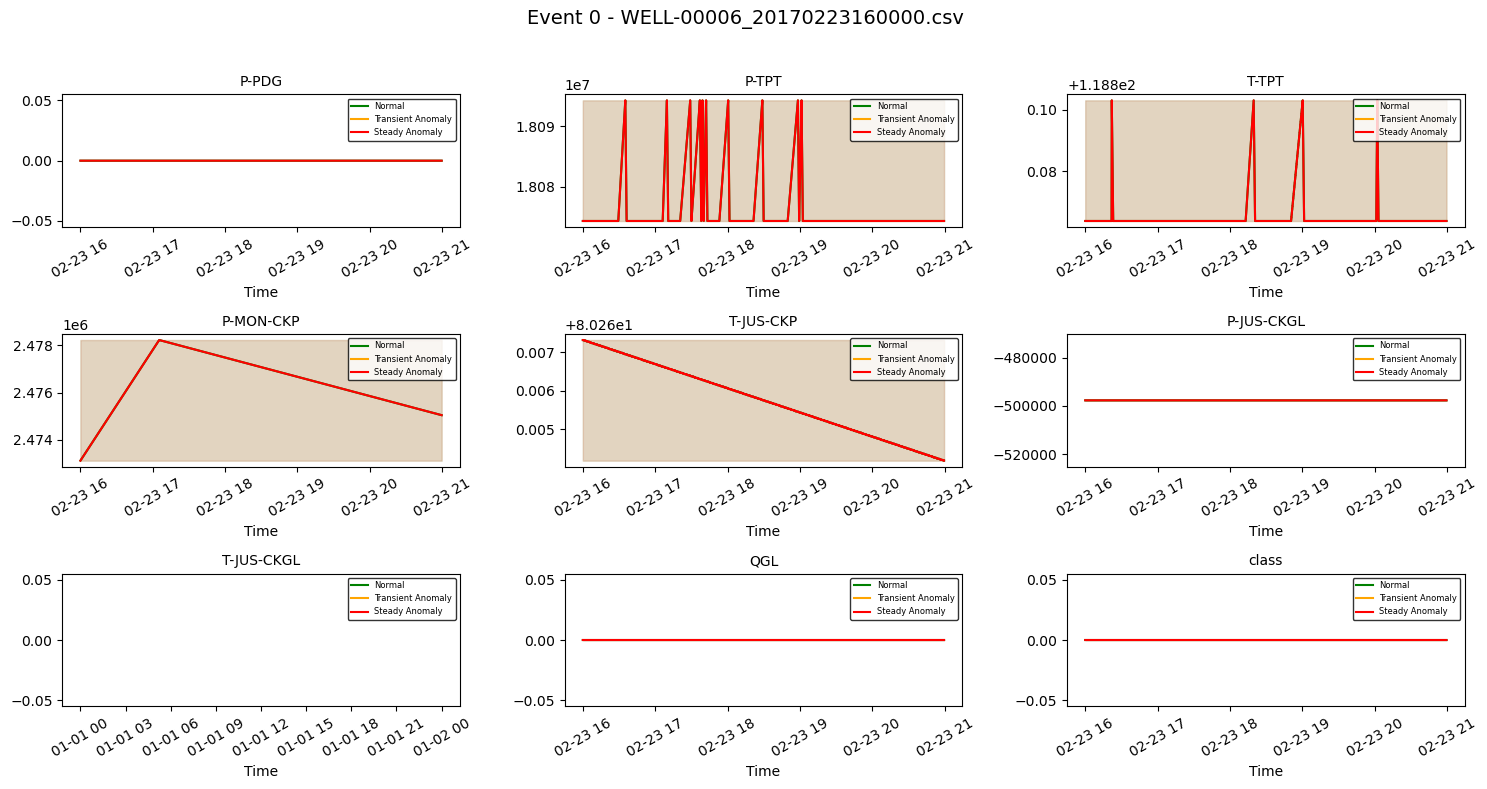


Selected file from 1: dataset\1\SIMULATED_00023.csv


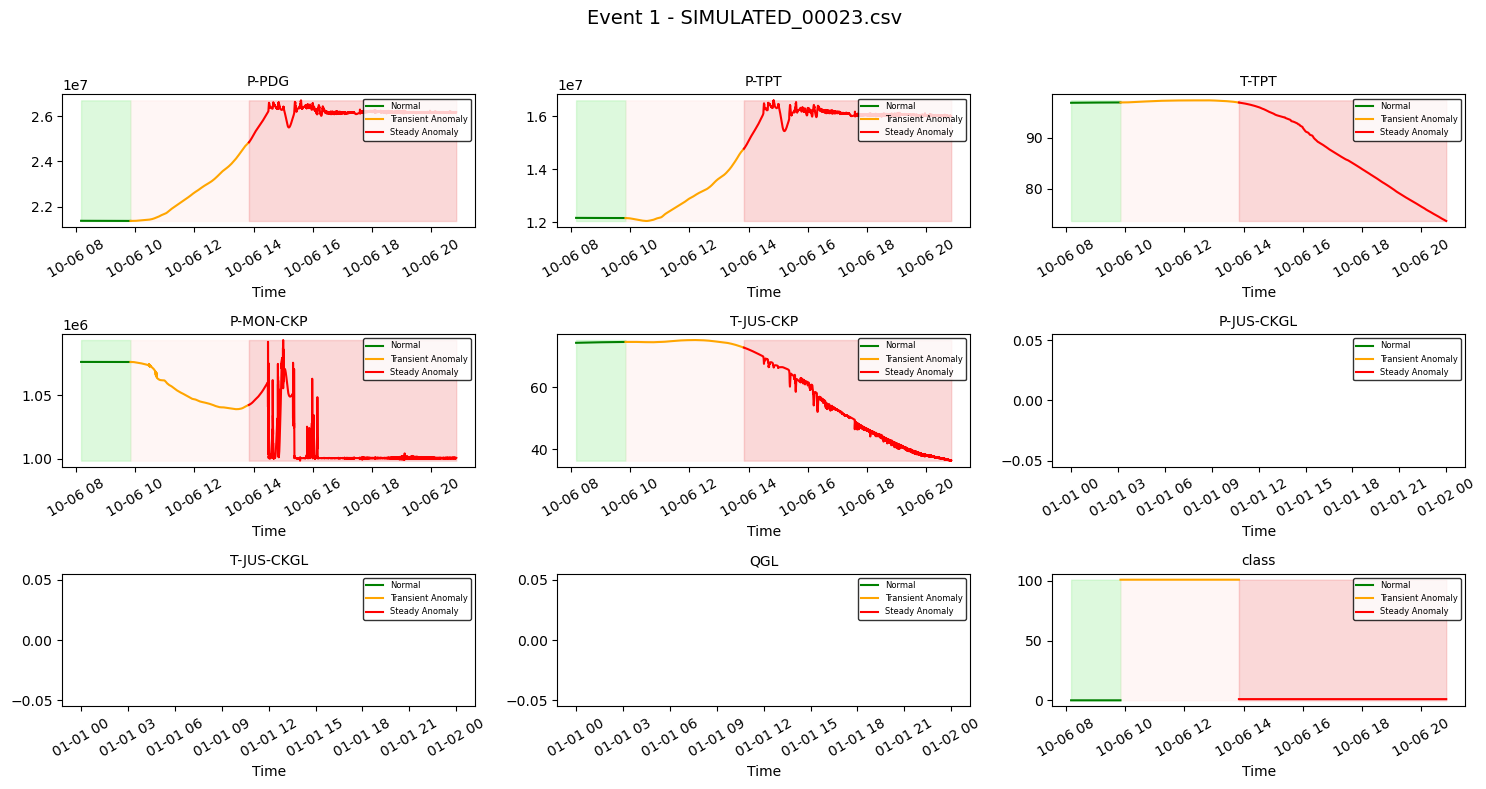


Selected file from 2: dataset\2\SIMULATED_00015.csv


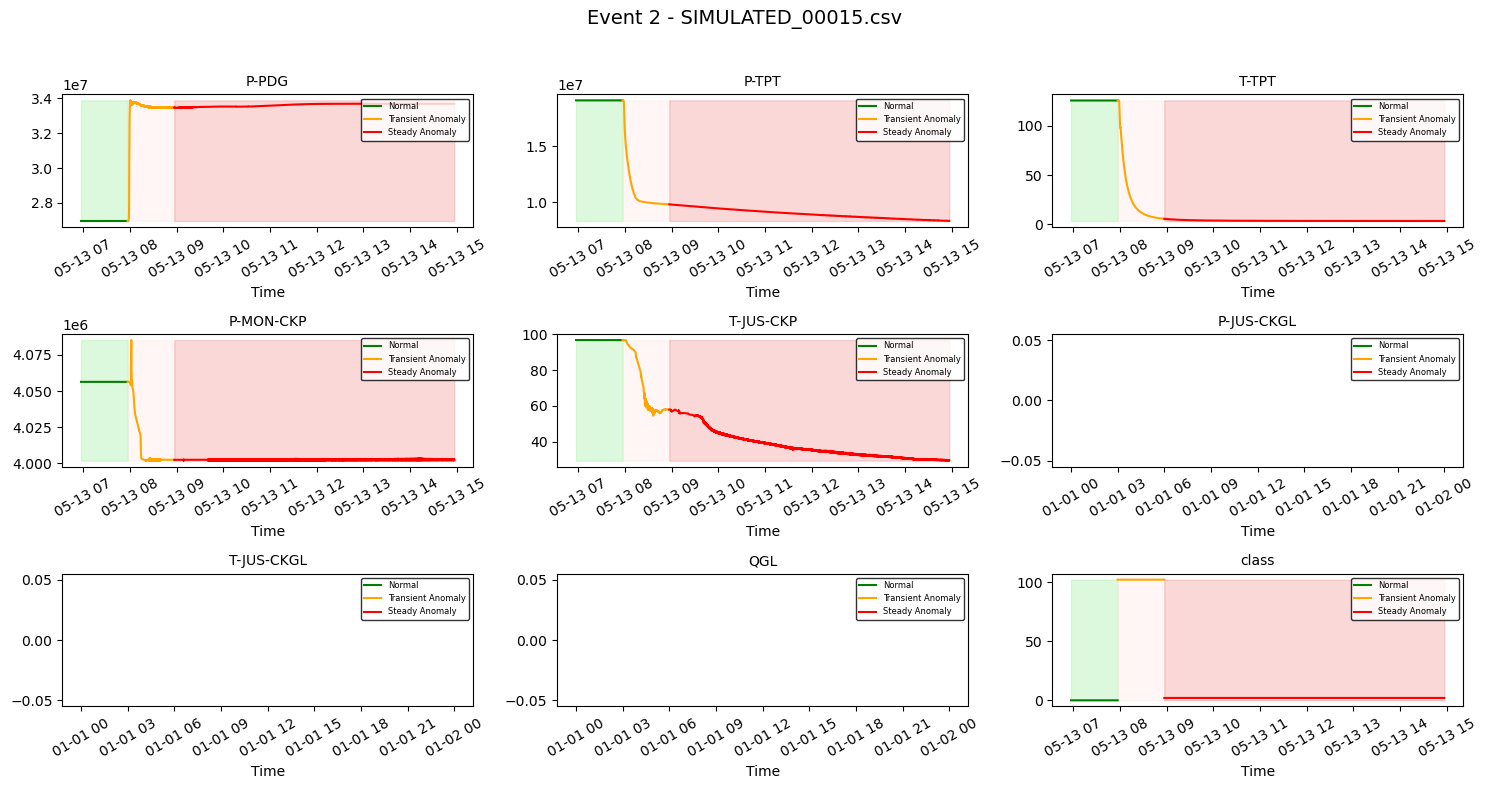


Selected file from 3: dataset\3\SIMULATED_00073.csv


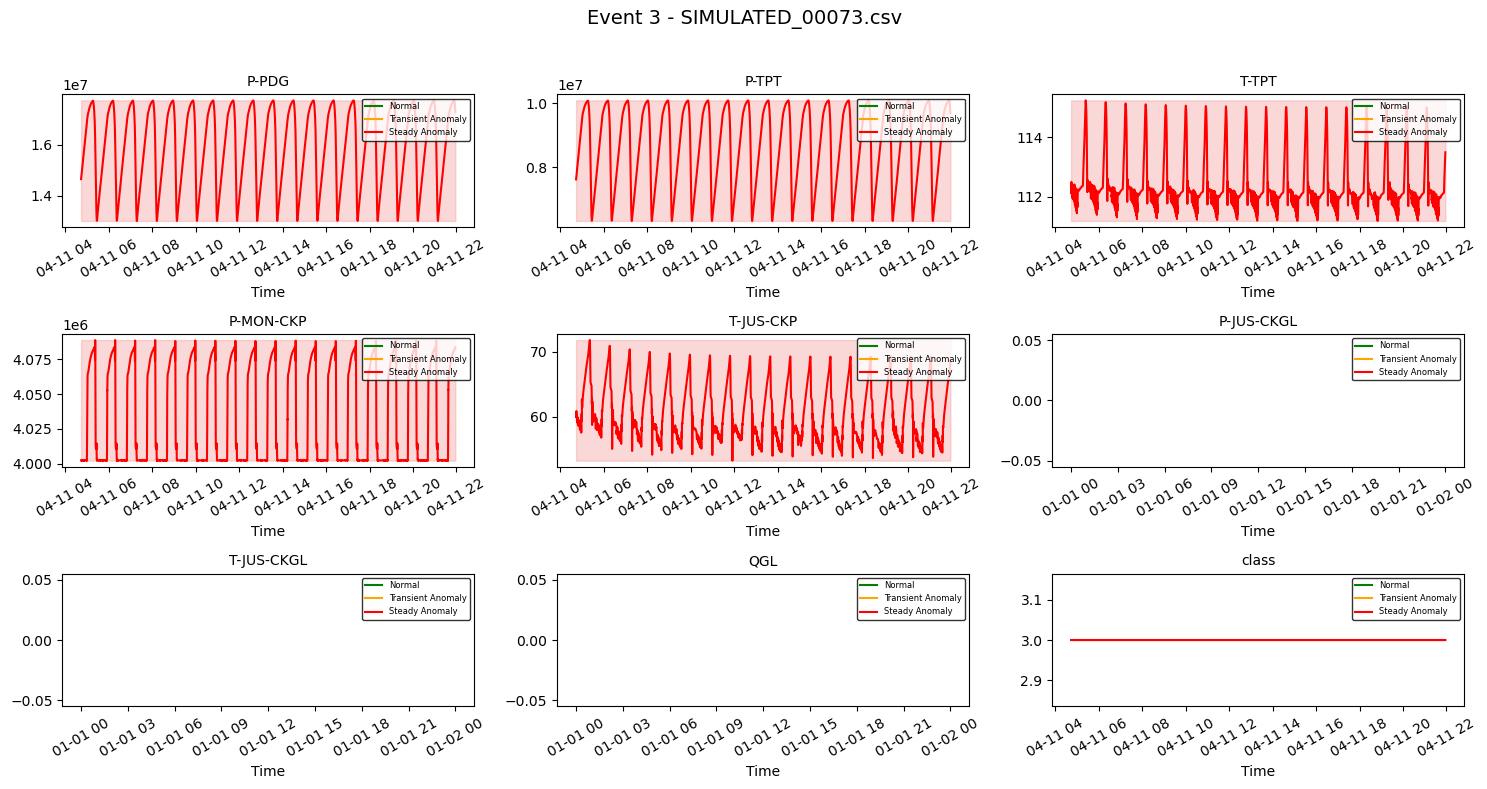


Selected file from 4: dataset\4\WELL-00010_20180423100050.csv


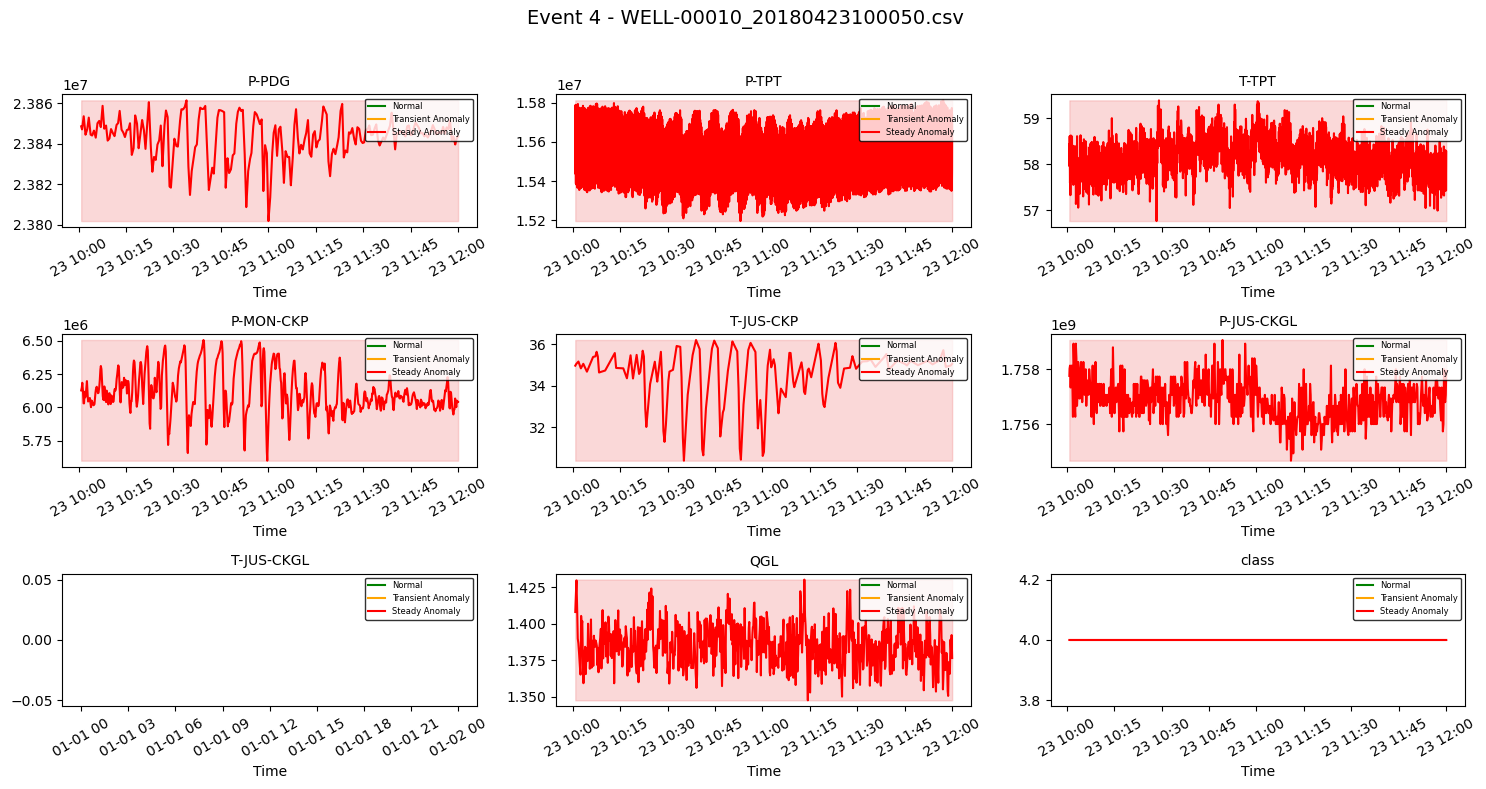


Selected file from 5: dataset\5\SIMULATED_00414.csv


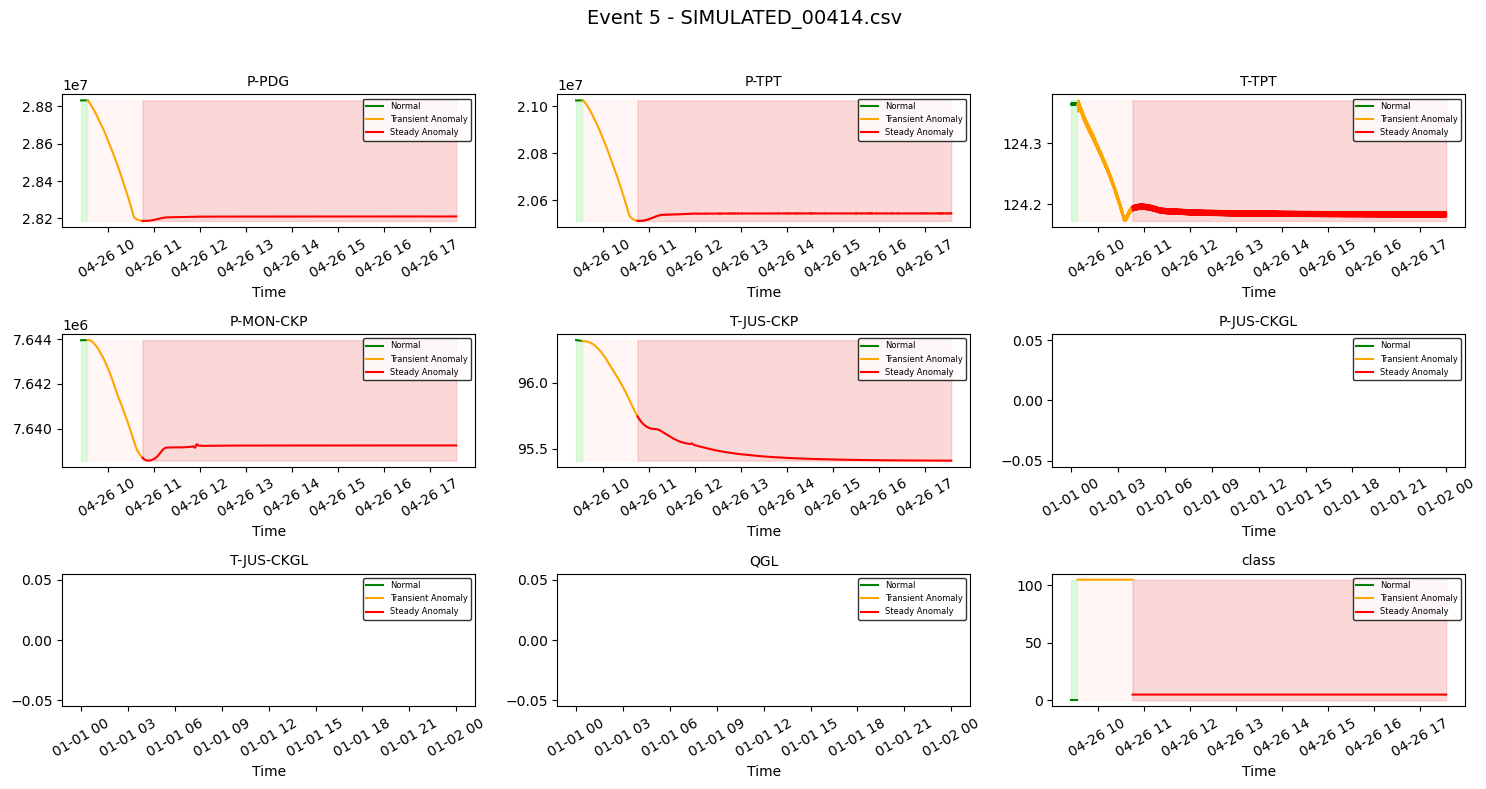


Selected file from 6: dataset\6\SIMULATED_00103.csv


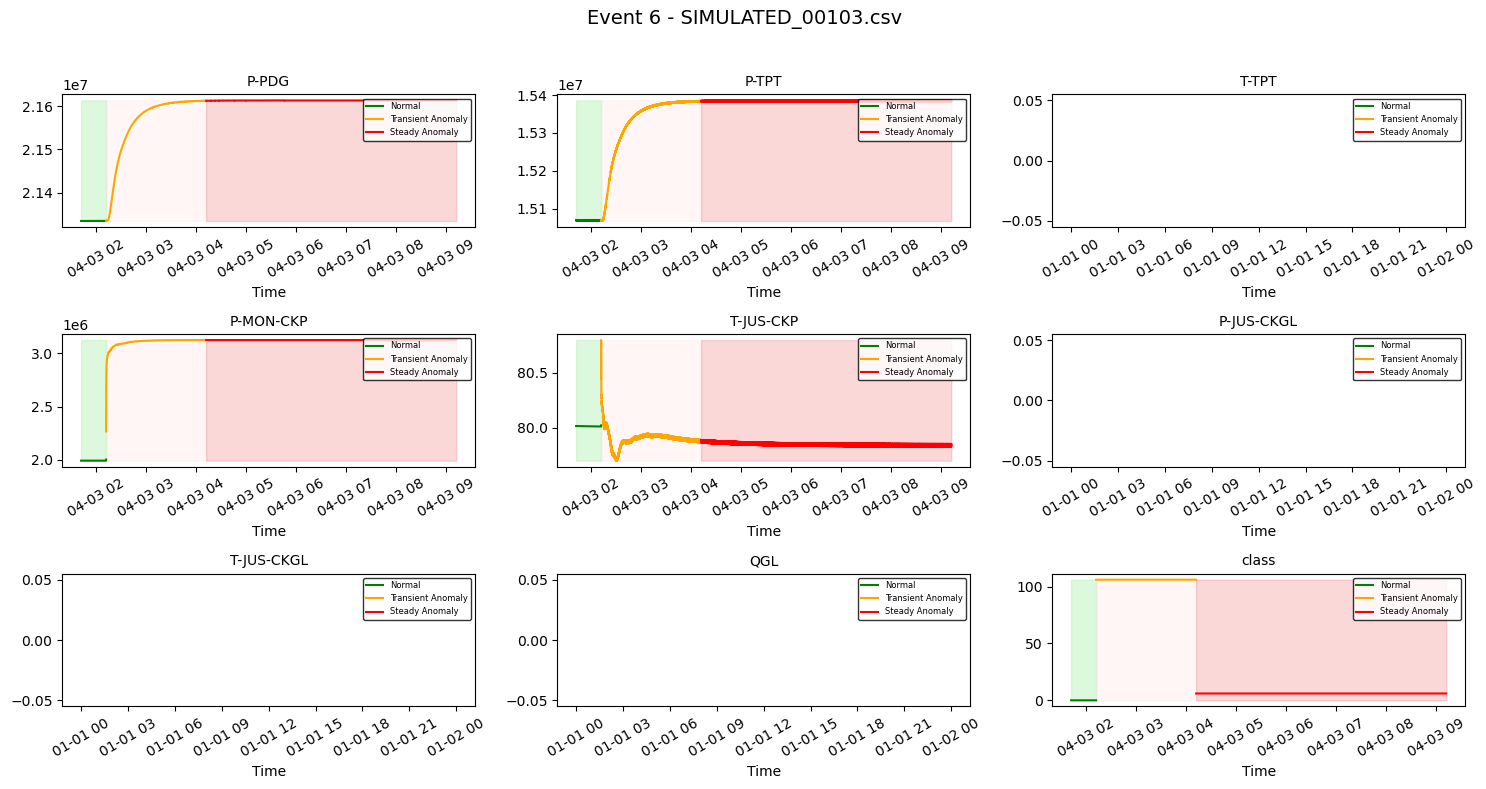


Selected file from 7: dataset\7\WELL-00006_20180617181315.csv


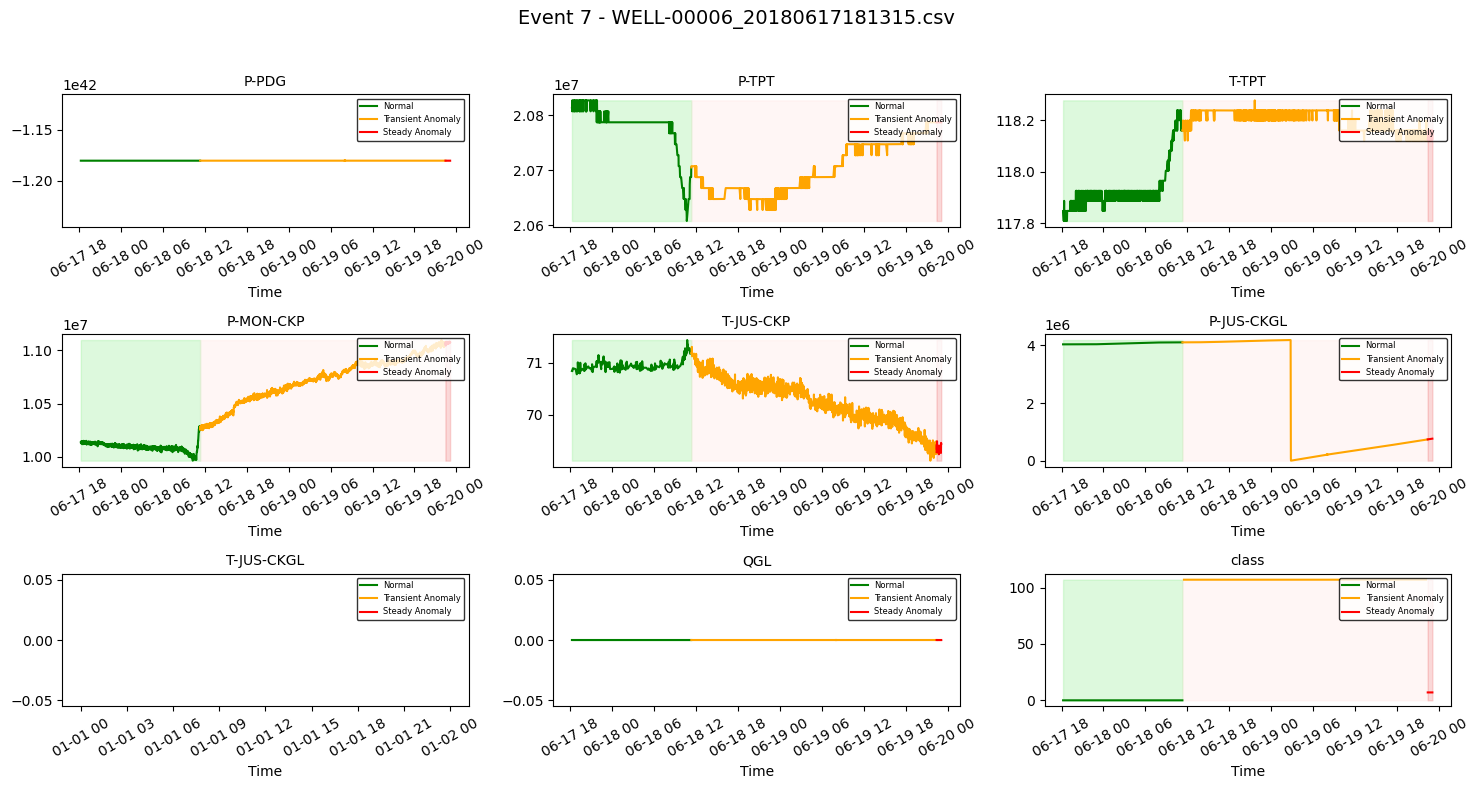


Selected file from 8: dataset\8\SIMULATED_00018.csv


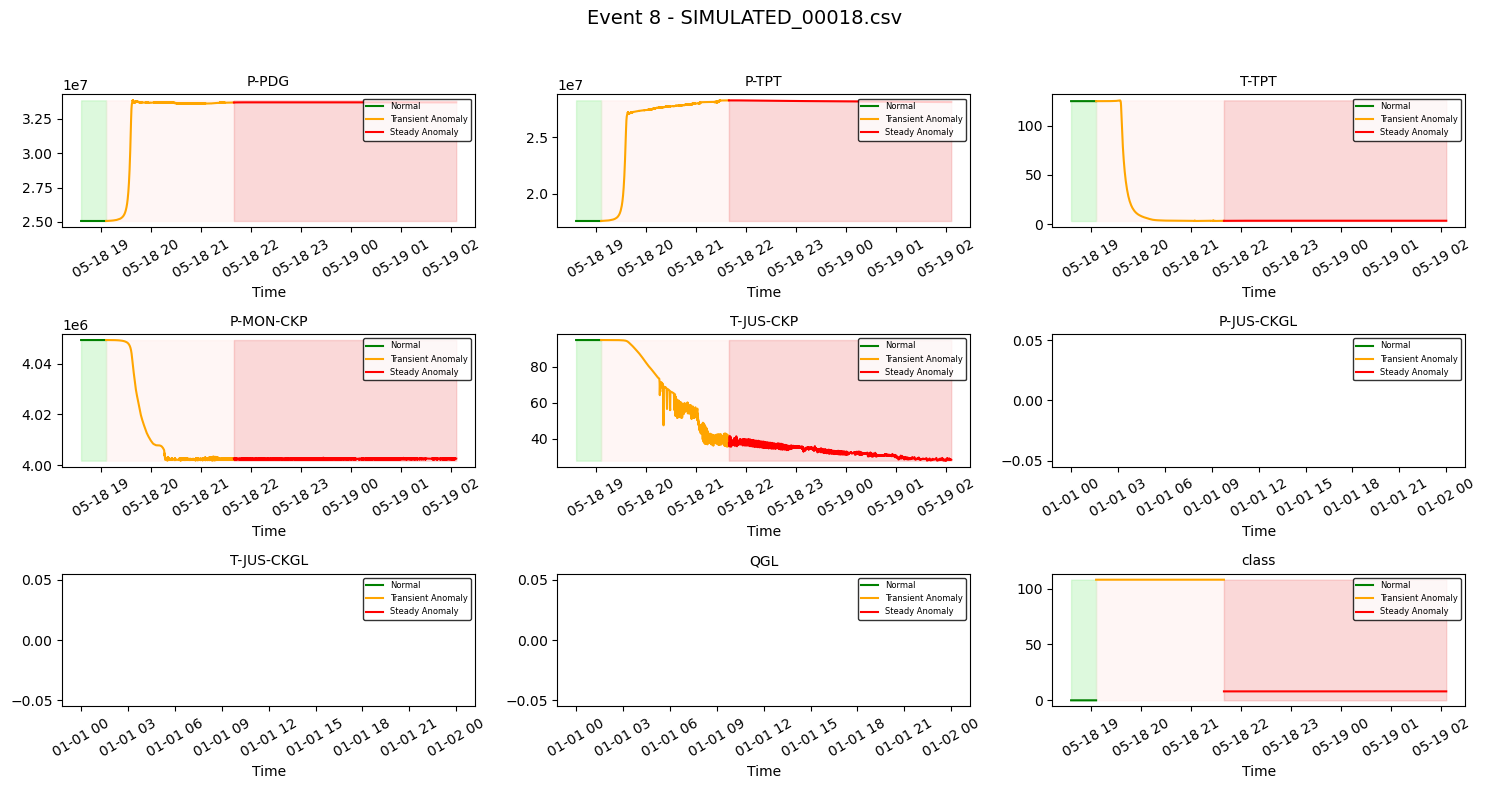

No CSV files in dataset\codes


In [113]:

def plot_random_csv_from_each_folder(dataset_path):
    """
    - Selects a random CSV file from each directory in 'dataset'
    - Plots all numeric columns as subplots in a 3x3 grid
    - Uses timestamp as x-axis
    """
    dataset_path = Path(dataset_path)  # Convert to Path object

    # Loop through each pipeline folder
    for subfolder in dataset_path.iterdir():
        if subfolder.is_dir():  
            csv_files = list(subfolder.glob("*.csv")) 

            if not csv_files:
                print(f"No CSV files in {subfolder}")
                continue  

            # Select a random CSV file from the folder
            random_csv_file = random.choice(csv_files)
            print(f"\nSelected file from {subfolder.stem}: {random_csv_file}")

            # Read the CSV file
            df = pd.read_csv(random_csv_file)

            # Identify timestamp class columns
            timestamp = df.columns[0]
            class_label_col = df.columns[10]

            # Convert timestamp column to datetime
            df[timestamp] = pd.to_datetime(df[timestamp], errors='coerce')
            df = df.dropna(subset=[timestamp]).sort_values(by=timestamp)

            # Select numeric columns (excluding timestamp)
            numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

            if timestamp in numeric_cols:
                numeric_cols.remove(timestamp) 

            if not numeric_cols:
                print(f"No numeric data in {random_csv_file}")
                continue  

           # Ensure class label column exists
            class_label_col = None
            for col in df.columns:
                if "class" in col.lower() or "label" in col.lower():
                    class_label_col = col
                    break

            if not class_label_col:
                print(f"No class label column found in {random_csv_file}")
                continue  

            # Convert class folder name to integer (assuming folders are named numerically)
            try:
                pipeline_class = int(subfolder.stem)
            except ValueError:
                print(f"Skipping folder {subfolder.stem}, not a valid pipeline number")
                continue 

            # Define subplot grid (3x3)
            num_plots = len(numeric_cols)
            rows, cols = 3, 3  # Fixed 3x3 grid
            total_subplots = rows * cols
            fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharex=False) #######################################

            # Flatten axes for easier iteration
            axes = axes.flatten()

            # Define colors and labels for different class sections
            class_sections = {
                "Normal": {"condition": df[class_label_col] == 0, "color": "green", "bg": "lightgreen", "label": "Normal"},
                "Transient Anomaly": {"condition": (df[class_label_col] != 0) & (df[class_label_col] != pipeline_class), "color": "orange", "bg": "mistyrose", "label": "Transient Anomaly"},
                "Steady Anomaly": {"condition": df[class_label_col] == pipeline_class, "color": "red", "bg":  "lightcoral", "label": "Steady Anomaly"},    
            }

            # Plot each column in a subplot
            for i, col in enumerate(numeric_cols[:total_subplots]):  
                ax = axes[i]
                
                # Plot each section with different colors
                for key, section in class_sections.items():
                    mask = section["condition"]
                    ax.plot(df[timestamp][mask], df[col][mask], label=section["label"], color=section["color"])
                    ax.fill_between(df[timestamp], df[col].min(), df[col].max(), where=mask, color=section["bg"], alpha=0.3)

                ax.set_title(col, fontsize=10)
                ax.legend(loc='upper right', fontsize=6, frameon=True, framealpha=0.8, edgecolor="black", fancybox=True)
                ax.grid(False)
                
                #  Label all x-axes and rotate them
                ax.set_xlabel("Time")  
                ax.tick_params(axis="x", rotation=30)

            # Remove unused subplots (if fewer than 9 numeric columns)
            for i in range(num_plots, total_subplots):
                fig.delaxes(axes[i])  

            # Set common x-axis label
            fig.suptitle(f"Event {subfolder.stem} - {random_csv_file.name}", fontsize=14)
            # plt.xticks(rotation=30)
            plt.tight_layout(rect=[0, 0, 1, 0.96])  
            plt.show()

# Run function
plot_random_csv_from_each_folder("dataset")


In [ ]:
csv_files = list(cleaned_data.keys())

#data_path_list

# 2. Pick a random file path
random_file_path = random.choice(csv_files)
#random_file_path

# 3. Get file class(directory) from path name 
data_class = list(random_file_path)
data_class

AttributeError: 'str' object has no attribute 'keys'